## Exploración de Datos (EDA - Análisis Exploratorio de Datos)

En esta fase crucial del proceso, llevaré a cabo un minucioso análisis de cada DataFrame asignado. El objetivo principal es obtener una comprensión profunda de los datos y derivar conclusiones fundamentadas que serán de gran utilidad en etapas posteriores.

Durante el EDA, se buscarán valores atípicos o inusuales que puedan influir en el análisis o en las decisiones posteriores. También se utilizarán herramientas de visualización para responder a preguntas que surjan durante el análisis. Esto implica la creación de gráficos informativos y el uso de técnicas estadísticas para explorar tendencias, patrones y relaciones en los datos.

El EDA es una parte esencial del proceso de análisis de datos, ya que proporciona una base sólida para la toma de decisiones informadas y la generación de información significativa a partir de los datos disponibles. Es un paso crucial que establece las bases para la fase posterior de modelado y predicción.

In [238]:
# Importando las librerias que usare en este proceso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
sns.set()

* Lectura del primer Dataframe que habla sobre la velocidad historica de internet media baja.

In [115]:
# Leyendo el Dataframe
df1= pd.read_csv('.\datos_EDA\historico_veloci_internetmediabaja_EDA.csv')

In [116]:
df1.head(10) # Visualizó las 10 primeras filas

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000
1,2022,4,Capital Federal,18.286
2,2022,4,Catamarca,8.333
3,2022,4,Chaco,10.402
4,2022,4,Chubut,1.592
5,2022,4,Córdoba,10.877
6,2022,4,Corrientes,9.472
7,2022,4,Entre Ríos,8.747
8,2022,4,Formosa,7.203
9,2022,4,Jujuy,3.932


In [117]:
df1.info() # Echo un vistazo que clase o tipo de datos son las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [118]:
df1.describe() # Utilizó el metodo describe() para analizar su valor estadistico

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,302.410067
std,2.583484,1.118682,287.314571
min,2014.000000,1.000000,1.000000
25%,2016.000000,1.750000,2.808500
50%,2018.000000,2.500000,344.000000
75%,2020.000000,3.250000,520.250000
max,2022.000000,4.000000,988.000000


## Análisis de Velocidad de Descarga de Internet en Provincias Argentinas

He realizado un análisis de la velocidad de descarga (Media de bajada) promedio de Internet en diversas provincias de Argentina a lo largo de los años y trimestres. Los datos recopilados abarcan un período desde 2014 hasta 2022 y proporcionan una visión detallada de la evolución de la velocidad de descarga en este país. <br>

Los datos revelan una velocidad de descarga promedio de aproximadamente 302.41 Megabits por segundo (Mbps) con una desviación estándar de 287.31 Mbps. Los valores oscilan desde un mínimo de 1 Mbps hasta un máximo de 988 Mbps. Es fundamental destacar que el valor mínimo de 1 Mbps podría requerir una revisión más detallada, ya que representa una velocidad de descarga extremadamente baja y posiblemente inconsistente con las normas típicas.<br>

El análisis de tendencias temporales revela que la velocidad de descarga ha experimentado fluctuaciones notables a lo largo de los años y trimestres. Este análisis se basa en la comparación de las mediciones en diferentes períodos y permite identificar patrones estacionales, picos de velocidad y cambios significativos en la conectividad a lo largo del tiempo.<br>

Uno de los hallazgos relevantes es la variación significativa en la velocidad de descarga entre las distintas provincias. Este análisis muestra que algunas provincias tienen un acceso a Internet más rápido en comparación con otras. Estas disparidades pueden deberse a una variedad de factores, como la infraestructura de red, la densidad de población y las inversiones en tecnología.

### ¿Cuál es la distribución de la velocidad media de bajada de Mbps en las provincias? <br>

Esta pregunta me surgio cuando hice la visualizacion estadistico con el metodo describe()

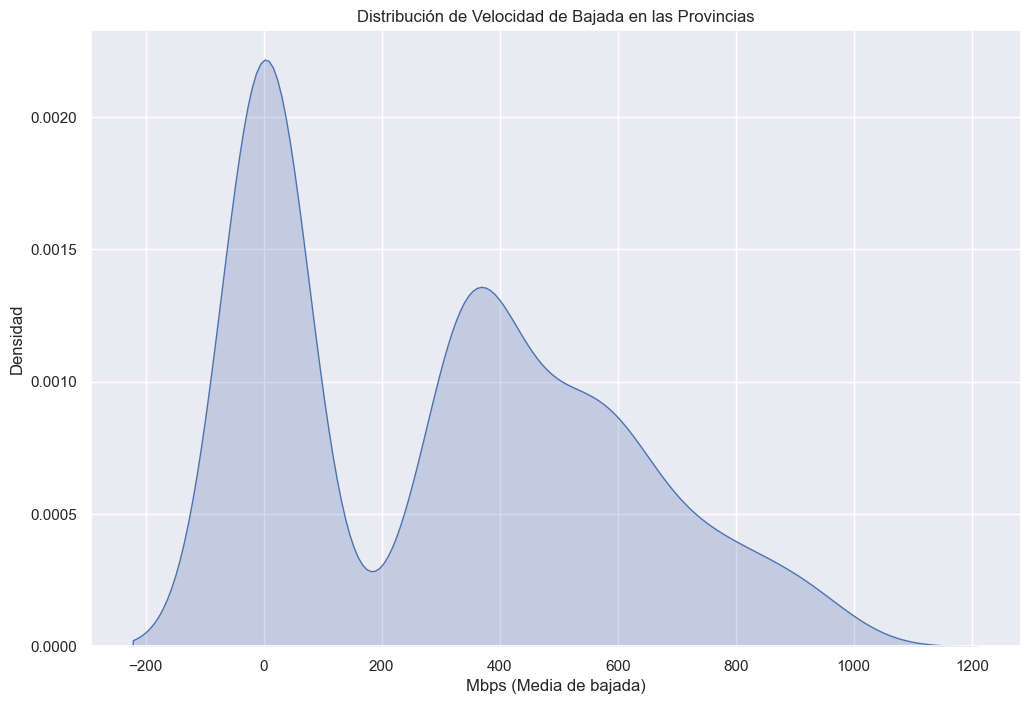

In [119]:
# Graficaré el dataframe
plt.figure(figsize=(12, 8))  # Ajustó el tamaño del gráfico.

# Utilizó seaborn para trazar un gráfico de densidad (Kernel Density Estimation)
sns.kdeplot(df1['Mbps (Media de bajada)'], fill=True)
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Densidad')
plt.title('Distribución de Velocidad de Bajada en las Provincias')
plt.grid(True)
plt.show()

Este gráfico de densidad presenta una representación visual de la distribución de la velocidad media de bajada en las provincias. La curva suave proporciona una visión clara de cómo se distribuyen los valores de velocidad en el conjunto de datos.

Observamos que la mayor densidad de velocidades se encuentra en torno a ciertos valores, lo que sugiere una concentración de provincias con velocidades de bajada específicas. La extensión y forma de la curva también indican la variabilidad en las velocidades entre las provincias.

------------------------------------------------------------------------------------------------------------------------------
En este otro gráfico represento la media de la velocidad de descarga en megabits por segundo (Mbps) para cada provincia.<br>

Cada barra muestra la velocidad media de descarga para una provincia en particular, las barras más altas indican las provincias con una velocidad de descarga más alta en promedio.

**Mi objetivo** es proporcionar una visión general de la velocidad media de descarga en cada provincia, lo que permite identificar las diferencias en la calidad del servicio de Internet entre las provincias.

**En conclusión** las provincias con barras más altas representan aquellas con una mayor velocidad media de descarga en Mbps, mientras que las barras más bajas indican provincias con una velocidad media de descarga más lenta.

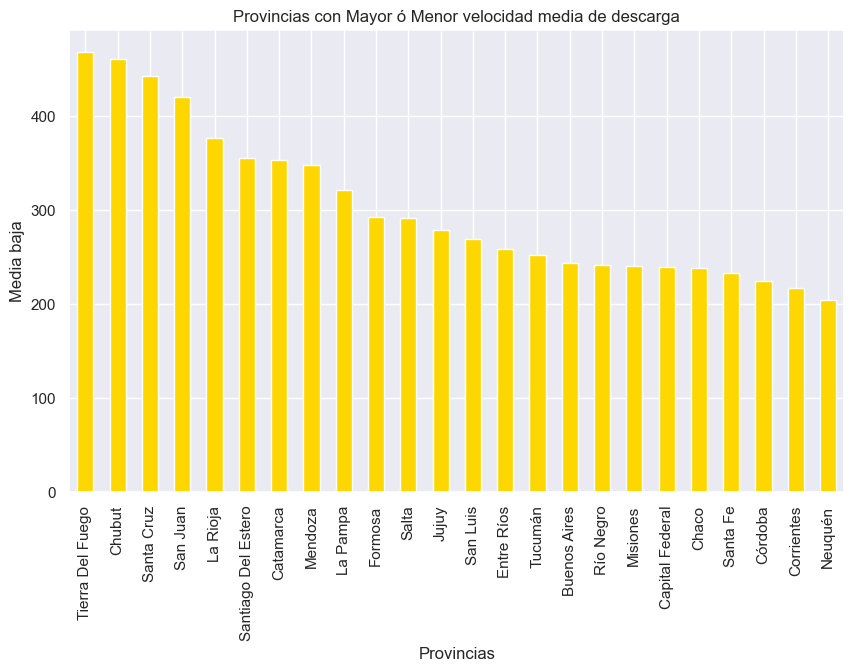

In [124]:
# Agrupó los datos por provincia y calculó la media de la velocidad de descarga en Mbps para cada provincia mediante
datos_agrupados = df1.groupby('Provincia')['Mbps (Media de bajada)'].mean().sort_values(ascending=False) 

'''Ordenó las provincias de acuerdo 
    con su velocidad media de descarga en orden descendente'''
    
plt.figure(figsize=(10, 6))
datos_agrupados.plot(kind='bar', color='gold')
plt.xlabel('Provincias') #Se añaden etiquetas a los ejes x e y
plt.ylabel('Media baja')
plt.title('Provincias con Mayor ó Menor velocidad media de descarga')
plt.show()

- Lectura del segundo Dataframe,que habla sobre el tipo de tecnologías.

In [8]:
df2 = pd.read_csv('.\datos_EDA\internet_accestecnologia_EDA.csv') # Leyendo mi segundo Dataframe

In [9]:
df2.head() # visualizo las primeras filas

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,326.0,3.0,1.0,130.0,72.0,5.0
1,2022,4,Capital Federal,139.0,1.0,139.0,5.0,32.0,2.0
2,2022,4,Catamarca,9.0,11.0,47.0,1.0,2.0,71.0
3,2022,4,Chaco,25.0,61.0,47.0,8.0,3.0,144.0
4,2022,4,Chubut,45.0,74.0,10.0,31.0,9.0,169.0


In [10]:
df2.shape # Veo la estructura de los datos 

(864, 9)

A continuación muestro el siguiente conjunto de estadísticas que proporciona una visión detallada de la distribución y tendencias en la cantidad de conexiones para diferentes tipos:

1. Distribución Desigual: Se observa una variabilidad significativa en la cantidad de conexiones entre los tipos. Mientras que "Fibra Óptica" tiene una cantidad media considerablemente alta, otros tipos como "ADSL" y "Wireless" muestran valores más bajos, indicando una distribución desigual de preferencias.

2. Amplitud en Rangos: El rango entre el valor mínimo y máximo destaca la diversidad en la cantidad de conexiones para cada tipo. Por ejemplo, la presencia de valores máximos notables en "Cablemodem" y "Fibra Óptica" sugiere una demanda significativa en ciertas regiones o entre ciertos grupos de usuarios.

3. Mediana como Indicador de Tendencia Central: La mediana, representada por el valor en el percentil 50%, ofrece una medida robusta de la tendencia central. La mediana más alta en "Fibra Óptica" indica que la mitad de las observaciones se encuentran por encima de este punto, subrayando la centralidad de este tipo de conexión.

4. Importancia de Cuartiles: Los cuartiles revelan la dispersión de datos alrededor de la mediana. Por ejemplo, el tercer cuartil en "Fibra Óptica" indica que el 75% de las observaciones caen por debajo de este valor, mostrando la concentración de conexiones en una parte significativa de la distribución.

5. Valor Mínimo como Punto de Partida: El valor mínimo destaca la presencia de al menos una conexión para cada tipo, resaltando la inclusión de todas las opciones en el conjunto de datos.

In [11]:
df2.describe() # Veo el resumen estadístico.

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000
mean,86.363426,103.291667,165.432870,57.777778,102.712963,137.636574
std,116.431490,188.849172,266.807807,156.015038,207.418981,180.798813
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,21.000000,9.000000,9.000000,4.000000,3.000000,39.750000
50%,46.000000,35.500000,25.000000,10.000000,15.000000,91.000000
75%,81.000000,72.250000,170.750000,26.000000,47.000000,143.250000
max,720.000000,999.000000,998.000000,952.000000,987.000000,987.000000


* Grafico la Cantidad Media de Tipo de Conexiones.

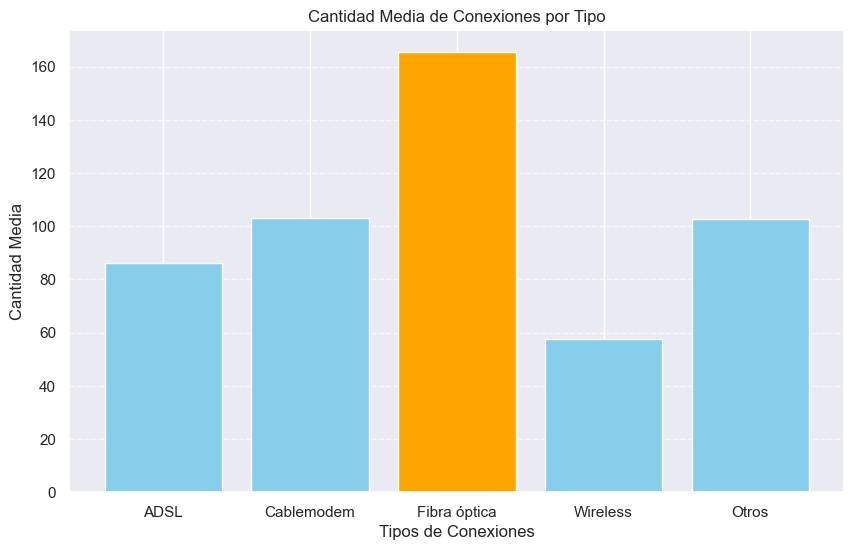

In [12]:
# Creo una lista que representan los tipos de conexiones de Internet y una lista de los valores medios.
tipos_conexiones = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
cantidad_media = [86.36, 103.29, 165.43, 57.78, 102.71]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario

# Utilizamos un color distinto para resaltar el valor más alto
colors = ['skyblue' if valor != max(cantidad_media) else 'orange' for valor in cantidad_media]
plt.bar(tipos_conexiones, cantidad_media, color=colors)

plt.xlabel('Tipos de Conexiones')
plt.ylabel('Cantidad Media')
plt.title('Cantidad Media de Conexiones por Tipo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


Al examinar el gráfico presentado anteriormente, surge la siguiente interrogante: <br>
**¿Cuáles son algunas de las provincias que utilizan la tecnología de Fibra Óptica para la conexión a Internet?**

La visualización proporciona una perspectiva general de la distribución de la tecnología de Fibra Óptica. Para identificar específicamente las provincias que emplean esta tecnología, se puede realizar un análisis adicional centrado en aquellas regiones donde se observa un mayor predominio de la categoría de Fibra Óptica en el gráfico.

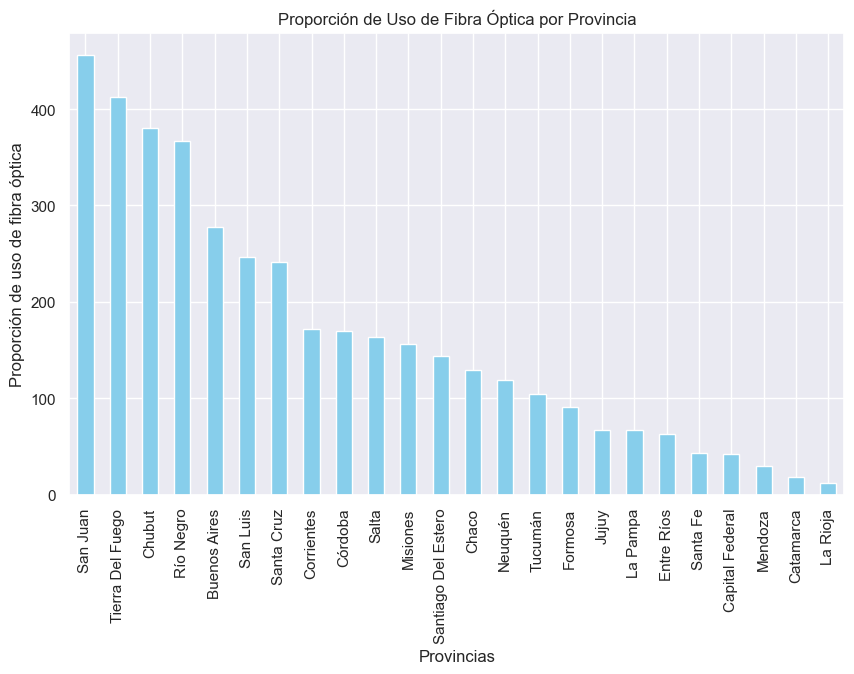

In [13]:
# Agrupó los datos por la columna 'Provincia', calculando el promedio de la columna 'Fibra óptica' para cada provincia.
datos_agrupados = df2.groupby('Provincia')['Fibra óptica'].mean().sort_values(ascending=False) # Ordeno los resultados de la media en orden descendente. 

# Creo el Grafico.
plt.figure(figsize=(10, 6))
datos_agrupados.plot(kind='bar', color='skyblue')
plt.xlabel('Provincias')
plt.ylabel('Proporción de uso de fibra óptica')
plt.title('Proporción de Uso de Fibra Óptica por Provincia')
plt.show()

El gráfico de barras presenta una visión concisa de la cantidad media de conexiones para diferentes tipos de conexión, reflejando la variabilidad en la demanda de servicios de Internet. A continuación, se destacan algunos puntos clave:

1. Fibra Óptica lidera la demanda: Se observa que el tipo de conexión "Fibra Óptica" domina en términos de cantidad media, superando a otros tipos. Esto sugiere una preferencia significativa por la alta velocidad y confiabilidad asociada con las conexiones de fibra óptica.

2. Diversidad en Preferencias: Los tipos de conexión como "Cablemodem" y "Otros" también tienen una presencia notable, indicando una diversidad en las preferencias de los usuarios. La oferta de diferentes opciones puede estar alineada con las necesidades específicas de los usuarios.<br>

Con el propósito de obtener una comprensión más detallada, procederé a generar otro gráfico de barras que ilustre qué provincias utilizan las tecnologías de 'Cablemódem' y 'Otros'. Esta iniciativa busca disipar cualquier incertidumbre y enriquecer el análisis, permitiendo identificar claramente las provincias que emplean estas tecnologías específicas en el contexto de las conexiones a Internet.

<Figure size 1500x600 with 0 Axes>

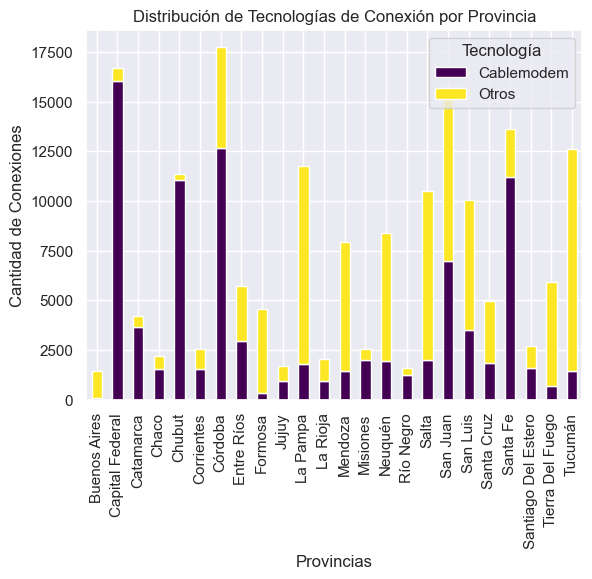

In [155]:
# Agrupo los datos por la columna 'Provincia' y sumo las frecuencias de 'Cablemódem' y 'Otros'
datos_agrupados = df2.groupby('Provincia')[['Cablemodem', 'Otros']].sum()

# Creo el gráfico de barras
plt.figure(figsize=(15, 6))
datos_agrupados.plot(kind='bar', stacked=True, colormap='viridis')

plt.xlabel('Provincias')
plt.ylabel('Cantidad de Conexiones')
plt.title('Distribución de Tecnologías de Conexión por Provincia')
plt.legend(title='Tecnología', loc='upper right')
plt.show()


- Lectura del Tercer Dataframe sobre la accesibilidad de velocidad en cada provincia.

In [14]:
# Leyendo los datos
df3 = pd.read_csv('.\datos_EDA\internetfijo_velocidadbaja_provincia_EDA.csv')

In [15]:
df3.head() # Visualizo las primeras filas

,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,63 Mbps,64 Mbps,65 Mbps,66 Mbps,67 Mbps,68 Mbps,70 Mbps,71 Mbps,75 Mbps,77 Mbps
0,2022.0,4.0,Buenos Aires,97.634,18,- 0,- 0,28.724,192,4.611,...,- 0,- 0,14,- 0,- 0,- 0,5.655,- 0,90.796,- 0
1,2022.0,4.0,Capital Federal,106.772,31,- 0,- 0,451.000,34,1.307,...,- 0,- 0,- 0,1,- 0,- 0,15,- 0,28.406,- 0
2,2022.0,4.0,Catamarca,2.280,- 0,- 0,- 0,34.000,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,4.0,Chaco,3.909,- 0,225,111,234.000,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,4.0,Chubut,20.026,8,- 0,- 0,69.000,32,836,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [16]:
df3.shape # Veo cuantas filas tiene el dataframe

(504, 97)

In [17]:
df3.describe() # Visualizo estadisticamente

,Año,Trimestre,"0,5 Mbps",3 Mbps,10 Mbps
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,2019.857143,2.571429,135.160514,536.427409,1830.656857
std,1.522341,1.138019,1281.313402,3423.594162,13716.783075
min,2017.000000,1.000000,1.009000,1.029000,1.000000
25%,2019.000000,2.000000,19.000000,5.910000,7.161500
50%,2020.000000,3.000000,39.000000,9.833000,20.563500
75%,2021.000000,4.000000,69.000000,27.000000,92.386750
max,2022.000000,4.000000,28724.000000,53034.000000,204191.000000


In [18]:
df3.info() # Observo de que tipo son mis datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         504 non-null    float64
 1   Trimestre   504 non-null    float64
 2   Provincia   504 non-null    object 
 3   Otros       504 non-null    object 
 4   0,256 Mbps  504 non-null    object 
 5   0,375 Mbps  504 non-null    object 
 6   0,625 Mbps  504 non-null    object 
 7   0,5 Mbps    504 non-null    float64
 8   0,512 Mbps  504 non-null    object 
 9   0,75 Mbps   504 non-null    object 
 10  1 Mbps      504 non-null    object 
 11  1,2 Mbps    504 non-null    object 
 12  1,25 Mbps   504 non-null    object 
 13  1,5 Mbps    504 non-null    object 
 14  2 Mbps      504 non-null    object 
 15  2,2 Mbps    504 non-null    object 
 16  2,5 Mbps    504 non-null    object 
 17  6,7 Mbps    504 non-null    object 
 18  3 Mbps      504 non-null    float64
 19  3,2 Mbps    504 non-null    o

El siguiente gráfico proporciona una visión de la velocidad baja de Internet en 10 provincias.

- El gráfico permite comparar la calidad del acceso a Internet en diferentes provincias para las categorías seleccionadas. Cada provincia se representa con barras agrupadas para las velocidades de 0,5 Mbps, 3 Mbps y 10 Mbps.

- Las alturas de las barras indican la cantidad media para cada categoría. Las provincias con barras más altas tienen una mayor calidad de acceso a Internet en esa categoría en particular.

- La agrupación de las barras por provincia facilita la comparación de la distribución de la calidad del acceso a Internet en diferentes categorías y provincias.

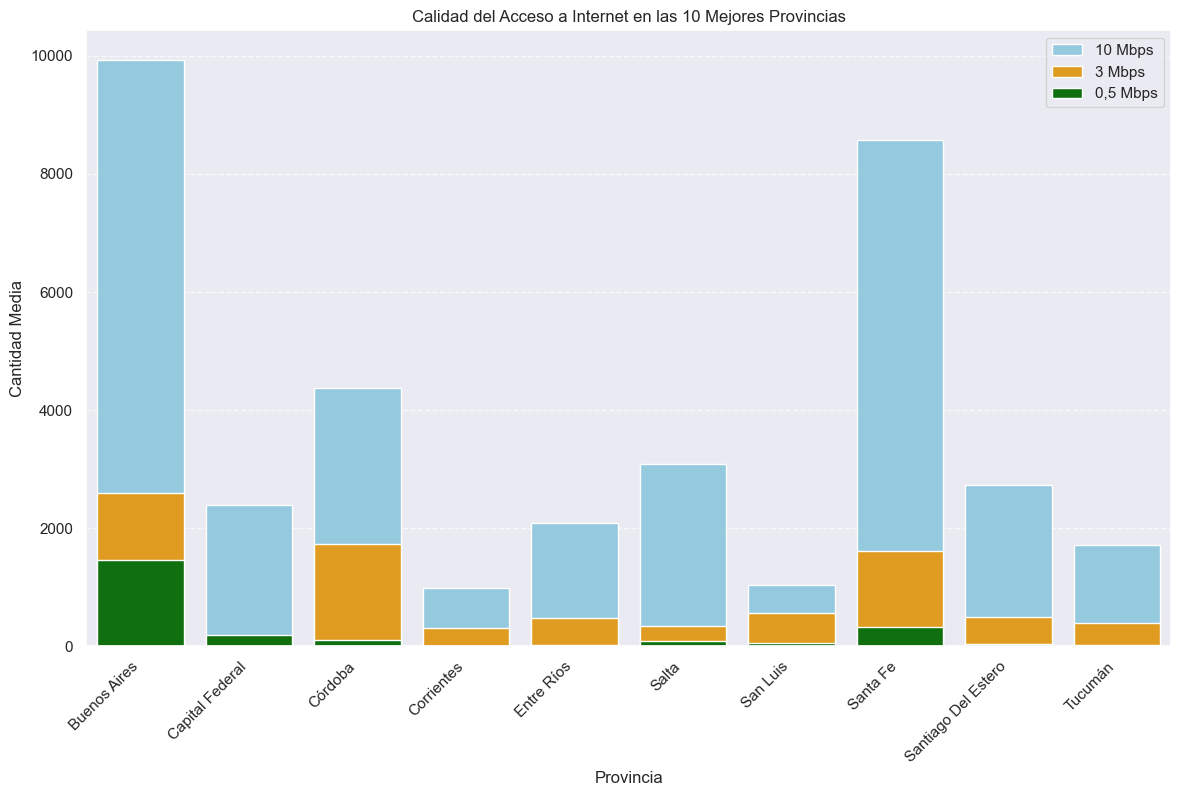

In [127]:
# Ordeno las 10 provincias que quiero mostrar
provincias_ordenadas = df3.groupby('Provincia')['10 Mbps'].mean().sort_values(ascending=False).index[:10]

# Incluiyo solo las 10 mejores provincias
df_top_provincias = df3[df3['Provincia'].isin(provincias_ordenadas)]

# Creo el gráfico
plt.figure(figsize=(14, 8))

# Utilizo Seaborn para crear el gráfico de barras
sns.barplot(data=df_top_provincias, x='Provincia', y='10 Mbps', color='skyblue', label='10 Mbps', errorbar=None)
sns.barplot(data=df_top_provincias, x='Provincia', y='3 Mbps', color='orange', label='3 Mbps', errorbar=None)
sns.barplot(data=df_top_provincias, x='Provincia', y='0,5 Mbps', color='green', label='0,5 Mbps', errorbar=None)

plt.xlabel('Provincia')
plt.ylabel('Cantidad Media')
plt.title('Calidad del Acceso a Internet en las 10 Mejores Provincias')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Sería interesante explorar la variación entre las provincias en términos de velocidad y si hay alguna provincia destacada.**
- El gráfico de barras proporciona una comparación clara y efectiva de las velocidades de conexión entre diferentes provincias en las categorías de 0,5 Mbps, 3 Mbps y 10 Mbps.

- La representación visual de las barras para cada provincia permite una comparación directa de las velocidades en diferentes categorías, lo que facilita la identificación de las diferencias entre las provincias.

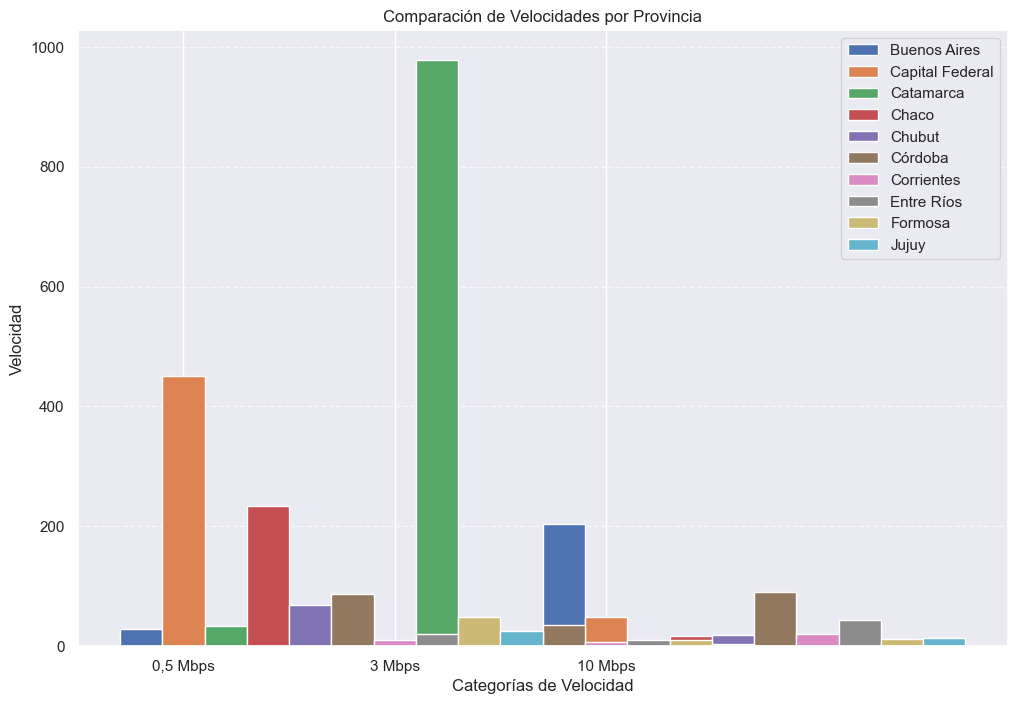

In [20]:
# extraigo y muestro las provincias únicas presentes en la columna.
provincias_muestra = df3['Provincia'].unique()[:10]

plt.figure(figsize=(12, 8))

for i, provincia in enumerate(provincias_muestra):
    datos_provincia = df3[df3['Provincia'] == provincia]
    velocidades = datos_provincia[['0,5 Mbps', '3 Mbps', '10 Mbps']].values[0]  # Obtengo los valores de velocidad para la provincia

    # Aqui se ajusta el ancho de las barras para mostrar las velocidades de manera diferenciada
    ancho_barra = 0.2
    desplazamiento = ancho_barra * i

    plt.bar(np.arange(len(velocidades)) + desplazamiento, velocidades, width=ancho_barra, label=provincia)

plt.xlabel('Categorías de Velocidad')
plt.ylabel('Velocidad')
plt.title('Comparación de Velocidades por Provincia')
plt.xticks(np.arange(len(velocidades)) + ancho_barra, ['0,5 Mbps', '3 Mbps', '10 Mbps'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


* Lectura del Cuarto Dataframe que nos muestra los ingresos miles en pesos argentinos.

In [21]:
# Leyendo los datos
df4 = pd.read_csv('.\datos_EDA\internet_ingresos_EDA.csv')

In [22]:
df4.head() # Mostrando las primeras filas.

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72,Oct-Dic 2022
1,2022,3,64,Jul-Sept 2022
2,2022,2,60,Abr-Jun 2022
3,2022,1,55,Ene-Mar 2022
4,2021,4,45,Oct-Dic 2021


El gráfico de barras representa los ingresos totales de cada año y está dividida por color para mostrar los ingresos por trimestre.

**Comparación de ingresos:** Permite comparar los ingresos entre años y trimestres de manera clara.<br>

**Tendencias estacionales:** La separación por trimestres ayuda a identificar posibles patrones estacionales o variaciones cíclicas en los ingresos.

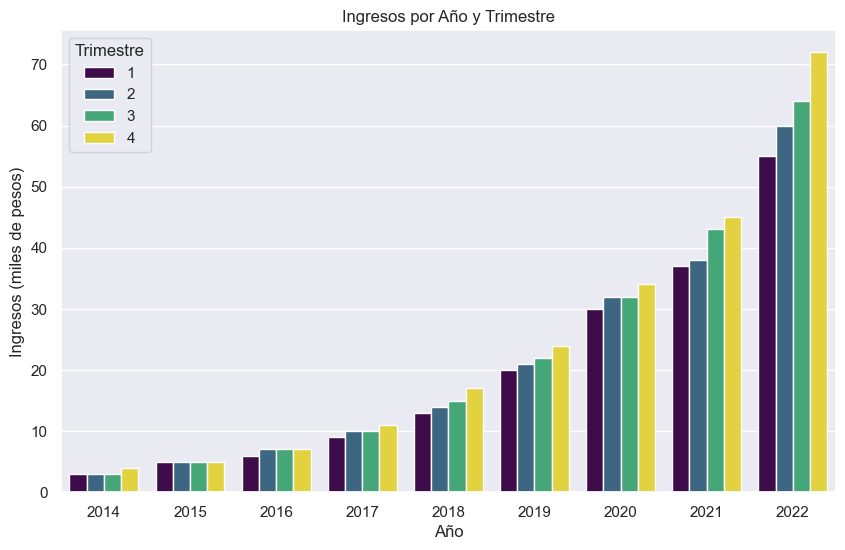

In [23]:
# Gráfico de barras por año
plt.figure(figsize=(10, 6))
sns.barplot(x='Año', y='Ingresos (miles de pesos)', data=df4, hue='Trimestre', palette='viridis')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Ingresos por Año y Trimestre')
plt.show()


El gráfico de barras por año y trimestre proporciona una visión interesante de la variabilidad de los ingresos a lo largo del tiempo.<br> Al observar el patrón, parece haber un aumento notorio en los ingresos durante el cuarto trimestre de cada año, sugiriendo que podría haber una correlación con la temporada navideña, aunque en los años 2015 y 2016 se ve que se mantuvo casí igual.

El fenómeno de un aumento en los ingresos durante el cuarto trimestre podría deberse a varios factores, como las compras navideñas, promociones especiales, eventos comerciales o simplemente el patrón de gastos típico de esa época del año.

- Utilizo el gráfico de línea para mostrar la tendencia de los ingresos a lo largo de los años.

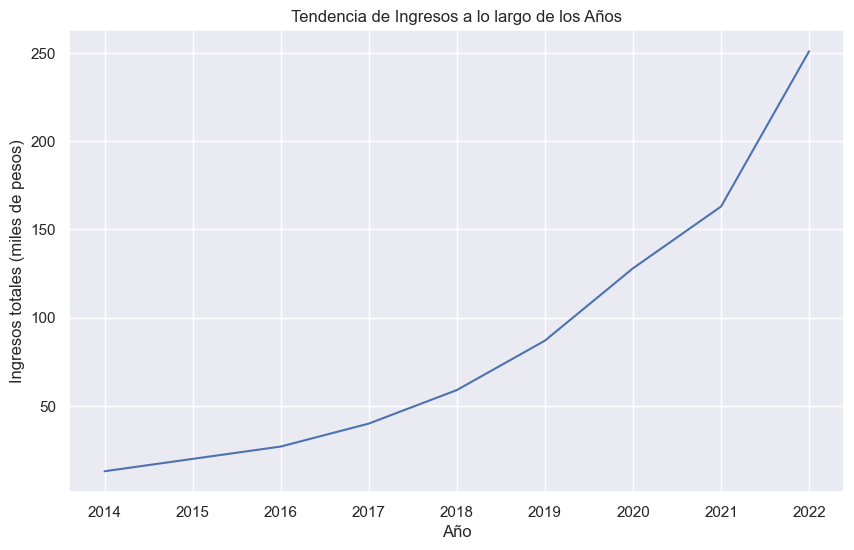

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=df4, estimator='sum', errorbar=None)
plt.xlabel('Año')
plt.ylabel('Ingresos totales (miles de pesos)')
plt.title('Tendencia de Ingresos a lo largo de los Años')
plt.show()


* Hago lectura del sexto Dataframe que habla sobre el acceso de internet a los hogares.

In [214]:
df6= pd.read_csv('.\datos_EDA\Internet_Penetracion_EDA.csv')

In [215]:
df6.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022,4,Buenos Aires,"78,94",NaN,NaN,NaN
1,2022,4,Capital Federal,"122,73",NaN,NaN,NaN
2,2022,4,Catamarca,"65,77",NaN,NaN,NaN
3,2022,4,Chaco,"43,62",NaN,NaN,NaN
4,2022,4,Chubut,"85,57",NaN,NaN,NaN


In [216]:
df6.shape

(864, 7)

In [217]:
# Supongamos que quieres borrar las columnas 'columna1' y 'columna2'
columnas_a_borrar = ['Unnamed: 4', 'Unnamed: 5','Unnamed: 6']

# Utiliza el método drop para eliminar las columnas
df6 = df6.drop(columnas_a_borrar, axis=1)

In [218]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           864 non-null    int64 
 1   Trimestre                     864 non-null    int64 
 2   Provincia                     864 non-null    object
 3   Accesos por cada 100 hogares  864 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.1+ KB


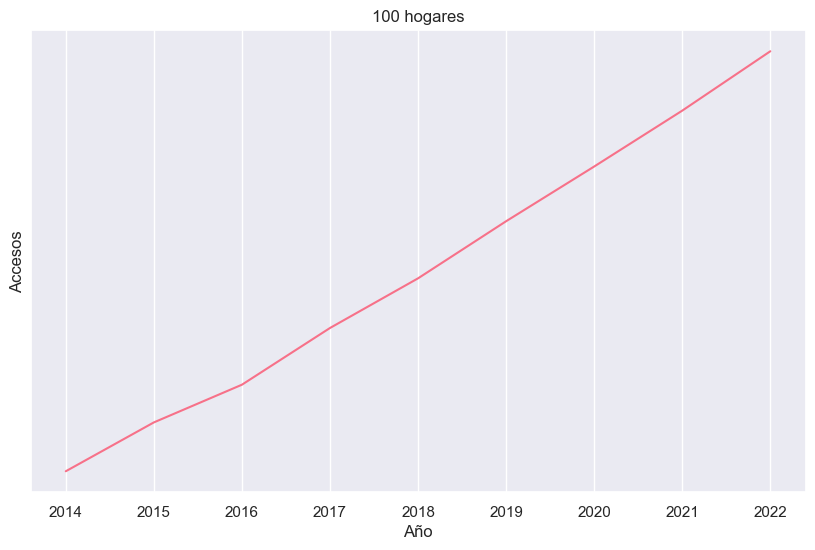

In [219]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df6, estimator='sum', errorbar=None)
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('100 hogares')
plt.show()


In [220]:
df6['Accesos por cada 100 hogares'] = df6['Accesos por cada 100 hogares'].str.replace(',', '')

In [221]:
df6['Accesos por cada 100 hogares'] = pd.to_numeric(df6['Accesos por cada 100 hogares'], errors='coerce')

In [222]:
print(df6['Accesos por cada 100 hogares'])

0       7894
1      12273
2       6577
3       4362
4       8557
       ...  
859     2894
860     4785
861     1631
862     6397
863     3342
Name: Accesos por cada 100 hogares, Length: 864, dtype: int64
